# ✅ Cell 1: Install & Import NLP Libraries

In [1]:
!pip install textblob vaderSentiment --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string


In [3]:
# ------------------------------------
# ⚙️ Helper Functions (same as scripts)
# ------------------------------------

def clean_text(text):
    text = str(text).lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def get_textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_vader_score(text):
    return SentimentIntensityAnalyzer().polarity_scores(text)['compound']

def label_sentiment(score, pos=0.1, neg=-0.1):
    if score >= pos:
        return 'Positive'
    elif score <= neg:
        return 'Negative'
    else:
        return 'Neutral'



# ✅ Cell 2: Load and Prepare Feedback

In [4]:

def load_csv(filepath: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
        print(f"✅ Loaded {filepath} - shape: {df.shape}")
        return df
    except:
        print(f"❌ Failed to load: {filepath}")
        return pd.DataFrame()

# Load and prepare feedback data
feedback_df = load_csv("/kaggle/input/recommender-system-data/session_feedback.csv")

# Rename to align with earlier scripts
feedback_df = feedback_df.rename(columns={
    "CustomerID": "learner_id",
    "Country": "trainer_id",
    "FeedbackScore": "rating"
})

# Create synthetic text column if missing
if 'feedback_text' not in feedback_df.columns:
    feedback_df['feedback_text'] = feedback_df['rating'].apply(lambda x: f"Feedback score: {x}")

feedback_df = feedback_df.dropna(subset=['feedback_text'])


✅ Loaded /kaggle/input/recommender-system-data/session_feedback.csv - shape: (38444, 11)


# ✂️ Cell 3: Clean Feedback Text

In [5]:
feedback_df['cleaned_feedback'] = feedback_df['feedback_text'].apply(clean_text)


# 💬 Cell 4: Apply Sentiment Analysis

In [6]:
feedback_df['tb_score'] = feedback_df['cleaned_feedback'].apply(get_textblob_polarity)
feedback_df['vader_score'] = feedback_df['cleaned_feedback'].apply(get_vader_score)


# 🏷️ Cell 5: Assign Sentiment Labels

In [7]:

feedback_df['tb_sentiment'] = feedback_df['tb_score'].apply(label_sentiment)
feedback_df['vader_sentiment'] = feedback_df['vader_score'].apply(label_sentiment)


# 📊 Cell 6: Visualize Sentiment Distributions


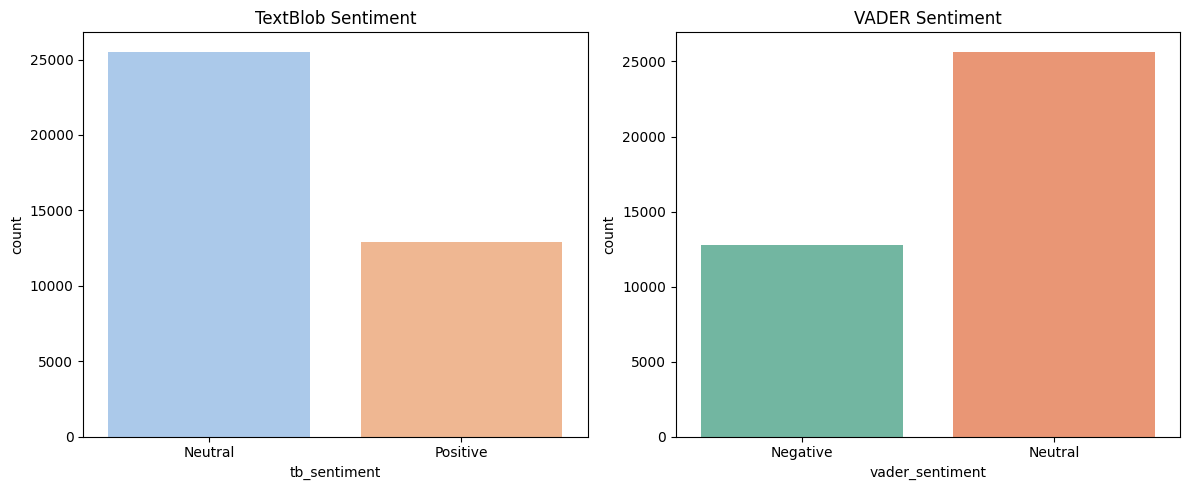

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='tb_sentiment', data=feedback_df, palette='pastel')
plt.title("TextBlob Sentiment")

plt.subplot(1, 2, 2)
sns.countplot(x='vader_sentiment', data=feedback_df, palette='Set2')
plt.title("VADER Sentiment")

plt.tight_layout()
plt.show()


# 📈 Cell 7: VADER Score vs. Rating

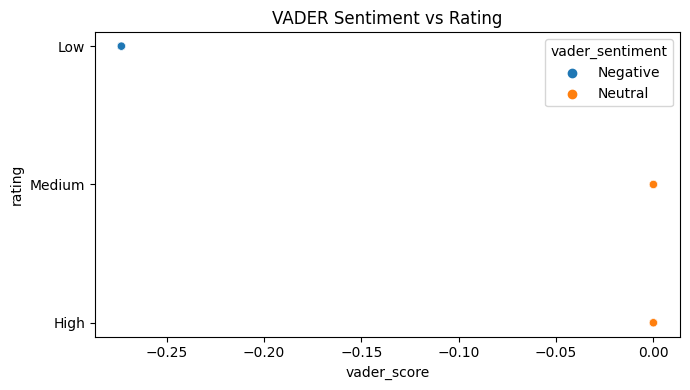

In [9]:

plt.figure(figsize=(7, 4))
sns.scatterplot(data=feedback_df, x='vader_score', y='rating', hue='vader_sentiment')
plt.title("VADER Sentiment vs Rating")
plt.tight_layout()
plt.show()


# 💾 Cell 8: Save for Next Steps

In [11]:

feedback_df.to_csv("/kaggle/working/preprocessed_feedback.csv", index=False)
print("✅ Saved to: data/preprocessed_feedback.csv")



✅ Saved to: data/preprocessed_feedback.csv



### 📌 Summary of Results:
- Feedback was cleaned and sentiment-analyzed using TextBlob and VADER.
- Sentiment distribution shows trends in learner opinion.
- VADER sentiment shows correlation with rating.
- Dataset saved for future modeling or dashboard analysis.
